In [19]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import noisy_moose as nm
import pickle
import os
from multiprocessing import Pool
import datetime
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
#own files
from Remove_Outlier import prepmovavgfunc as pmf
from create_X_and_Y import produce_dataset


# data_files_active = os.listdir("../output/waterfall/active/")

# vzlusat_active = list(i for i in data_files_active if "VZLUSAT-2" in i)

data_files_active = os.listdir("../output/VZLUSAT/water/")

vzlusat_active = list(i for i in data_files_active if "VZLUSAT-2" in i)


# List of bad files to exclude
bad_files = [
    "VZLUSAT-2_20241012T215504",
    "VZLUSAT-2_20241015T201954",
    "VZLUSAT-2_20241016T181904",
    "VZLUSAT-2_20241029T082929",
    "VZLUSAT-2_20241029T100144",
    "VZLUSAT-2_20241030T092934",
    "VZLUSAT-2_20241106T192716",
    "VZLUSAT-2_20241114T103154",
    "VZLUSAT-2_20241115T082607",
    "VZLUSAT-2_20241119T104843",
    "VZLUSAT-2_20241120T084215",
    "VZLUSAT-2_20241120T205344",
    "VZLUSAT-2_20241121T111348",
    "VZLUSAT-2_20241121T201934",
    "VZLUSAT-2_20241121T215402" # all the above ones are removed because they have signal power above 33 dBm which can only be due to interference
    #the below ones are removed because they have more datapoints in a row than possible from the transmission alone
    # ,'VZLUSAT-2_20241015T184843', 'VZLUSAT-2_20241016T090827', 'VZLUSAT-2_20241019T090728', 'VZLUSAT-2_20241019T212114', 'VZLUSAT-2_20241020T083624', 'VZLUSAT-2_20241021T093718', 'VZLUSAT-2_20241021T111042', 'VZLUSAT-2_20241021T201734', 'VZLUSAT-2_20241022T090555', 'VZLUSAT-2_20241023T083445', 'VZLUSAT-2_20241023T100710', 'VZLUSAT-2_20241025T211716', 'VZLUSAT-2_20241028T090106', 'VZLUSAT-2_20241029T113526', 'VZLUSAT-2_20241029T190948', 'VZLUSAT-2_20241029T221741', 'VZLUSAT-2_20241101T082545', 'VZLUSAT-2_20241104T112620', 'VZLUSAT-2_20241105T092004', 'VZLUSAT-2_20241106T102001', 'VZLUSAT-2_20241107T112021', 'VZLUSAT-2_20241110T201927', 'VZLUSAT-2_20241110T215359', 'VZLUSAT-2_20241111T090656', 'VZLUSAT-2_20241111T103945', 'VZLUSAT-2_20241112T083354', 'VZLUSAT-2_20241113T093235', 'VZLUSAT-2_20241113T110546', 'VZLUSAT-2_20241113T184111', 'VZLUSAT-2_20241114T085912', 'VZLUSAT-2_20241114T180947', 'VZLUSAT-2_20241115T095807', 'VZLUSAT-2_20241115T221248', 'VZLUSAT-2_20241116T105729', 'VZLUSAT-2_20241118T112258', 'VZLUSAT-2_20241119T091548', 'VZLUSAT-2_20241121T080916', 'VZLUSAT-2_20241122T103926', 'VZLUSAT-2_20241125T193601', 'VZLUSAT-2_20241126T203355', 'VZLUSAT-2_20241127T213306', 'VZLUSAT-2_20241128T205750', 'VZLUSAT-2_20241130T104230'
    #the below ones are removed because they have a period with target below 10, many of them are influenced by pointing error
    # ,'VZLUSAT-2_20241015T093930', 'VZLUSAT-2_20241016T104128', 'VZLUSAT-2_20241017T101004', 'VZLUSAT-2_20241018T201901', 'VZLUSAT-2_20241019T104028', 'VZLUSAT-2_20241020T100851', 'VZLUSAT-2_20241025T194405', 'VZLUSAT-2_20241026T100449', 'VZLUSAT-2_20241027T201256', 'VZLUSAT-2_20241028T194113', 'VZLUSAT-2_20241101T095746', 'VZLUSAT-2_20241109T101331', 'VZLUSAT-2_20241111T211928', 'VZLUSAT-2_20241113T201150', 'VZLUSAT-2_20241117T102328', 'VZLUSAT-2_20241118T202840', 'VZLUSAT-2_20241122T090639', 'VZLUSAT-2_20241124T093057', 'VZLUSAT-2_20241124T214354', 'VZLUSAT-2_20241126T112831', 'VZLUSAT-2_20241128T101855'
]

# Filter out bad files
vzlusat_active_filtered = [
    i for i in vzlusat_active if i.split('_pickled')[0] not in bad_files
]

obj_act: list[nm.prepping] = []  # Initialize list

load_all=True

#parameters for the prepmovavgfunc
signal_threshold = -138
peak_level = 3
noise_threshold = -180
window_size = 99


if load_all:
    for i in vzlusat_active_filtered:  # Use filtered list
        try:
            with open(f"../output/VZLUSAT/water/{i}", 'rb') as f:
                obj_act.append(pmf(pickle.loads(f.read()),signal_threshold=signal_threshold,   peak_level=peak_level, noise_threshold = noise_threshold ,  window_size=window_size))
        except FileNotFoundError:
            print(f"File not found: {i}, skipping...")
        except Exception as e:
            print(f"An error occurred while processing {i}: {e}")
else:
    for i in vzlusat_active_filtered[:15]:  # Use filtered list
        try:
            with open(f"../output/VZLUSAT/water/{i}", 'rb') as f:
                obj_act.append(pmf(pickle.loads(f.read()),signal_threshold=signal_threshold,   peak_level=peak_level, noise_threshold = noise_threshold ,  window_size=window_size))
        except FileNotFoundError:
            print(f"File not found: {i}, skipping...")
        except Exception as e:
            print(f"An error occurred while processing {i}: {e}")

print(f"Loaded {len(obj_act)} files")

Loaded 188 files


In [20]:
#Produce dataset from the objects. Reduces the resolution, adds features that make the x'es independent and normalises it.
X, Y, X_test, y_test, n_train_test_sets, n_test_sets, weights, weights_test = produce_dataset(obj_act, test_split = 0.3 ,pred_range = 10)
print(f"number of test/train sets: {n_train_test_sets}")
print(f"number of validation sets: {n_test_sets}")

#scaling
X_combined = np.vstack(X)
y_combined = np.hstack(Y)
# X_combined = np.squeeze(X)

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X_combined)
X_test_normalized = []
for i in range(len(X_test)):
    X_test_normalized.append(scaler.transform(X_test[i]))
    # print(f"X_val shape: {len(X_val[i])}")

scaler = MinMaxScaler()
weights=np.hstack(weights)
weights = np.array(scaler.fit_transform(weights.reshape(-1, 1))).flatten()
weights_test_normalized = []
for i in range(len(weights_test)):
    weights_test_normalized.append(scaler.transform(weights_test[i].reshape(-1, 1)))

# print(f"X normalised: {X_normalized.shape}")
# print(f"y combined: {y_combined.shape}")
# print(f"weights: {weights.shape}")
# print(f"X_val normalised: {len(X_val_normalized)}")
# print(f"X_val: {len(X_val)}")
# print(f"y_val: {len(y_val)}")
# print(f"weights_val: {len(weights_val_normalized)}")


# Splitting the dataset into training and testing sets
train_X=X_normalized
train_y=y_combined

Validation=False
if Validation:
    train_X, val_X, train_y, val_y, train_weights, val_weights = train_test_split(
        X_normalized, y_combined, weights, test_size=0.2, random_state=23) 
    # Check the shapes
    print(train_X.shape, train_y.shape, train_weights.shape)
    print(val_X.shape, val_y.shape, val_weights.shape)




number of test/train sets: 132
number of validation sets: 56


# Gradient boosting

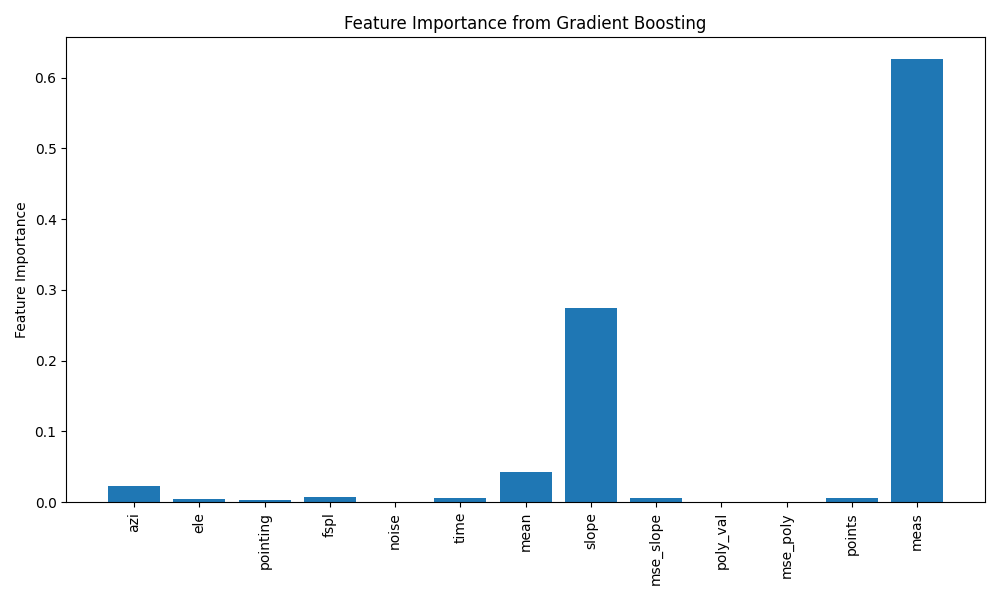

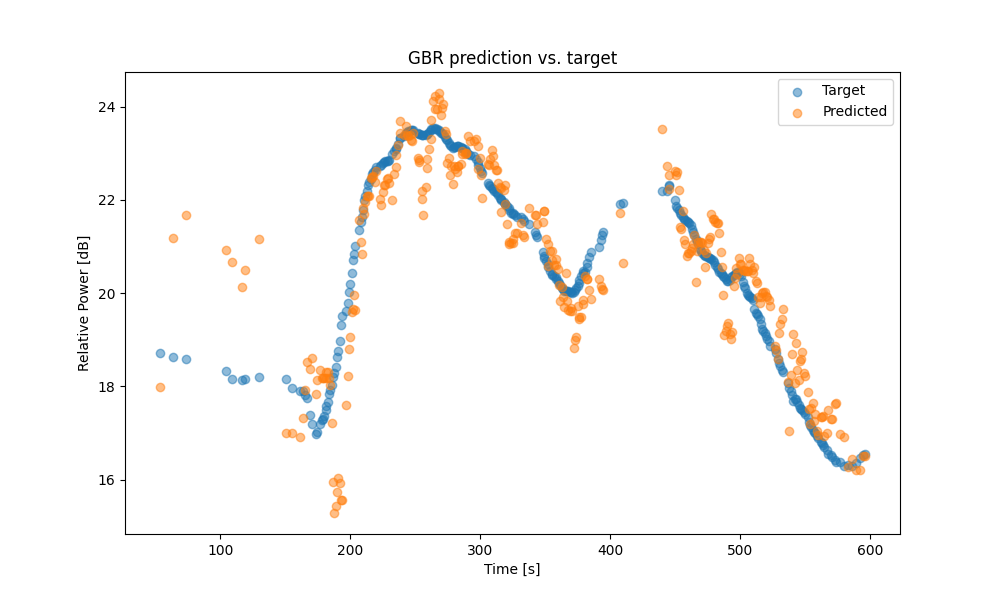

In [3]:
gbr = GradientBoostingRegressor(loss='squared_error',
                                learning_rate=0.1,
                                n_estimators=69,
                                max_depth=4, 
                                random_state=23)

# Fit the model to the training data
# gbr.fit(train_X, train_y, sample_weight = train_weights)
gbr.fit(train_X, train_y, sample_weight = None )
# Optional: Visualizing feature importance

plt.figure(figsize=(10, 6))
plt.bar(range(train_X.shape[1]), gbr.feature_importances_)
plt.xticks(range(train_X.shape[1]), ['azi',       # 0
                                     'ele',       # 1
                                     'pointing',  # 2
                                     'fspl',      # 3
                                     'noise',     # 4
                                     'time',      # 5
                                     'mean',      # 6
                                     'slope',     # 7
                                     'mse_slope', # 8
                                     'poly_val',  # 9
                                     'mse_poly',  # 10
                                     'points',    # 11
                                     'meas'],     # 12
           rotation=90)  # Rotate x-ticks
plt.ylabel('Feature Importance')
plt.title('Feature Importance from Gradient Boosting')
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()
plt.savefig("figures/Feature_GBR.pdf")

# errors=[]
for test_x_normalized, test_x, test_y, test_weights in zip(X_test_normalized[:1], X_test[:1], y_test[:1], weights_test[:1]):
    pred_y = gbr.predict(test_x_normalized)
    # Compute RMSE (Root Mean Squared Error)
    test_rmse = (mean_squared_error(test_y, pred_y, sample_weight=test_weights) ** (1 / 2))  # weighted RMSE

    # errors.append(test_y-pred_y)
    # Print RMSE
    # print(f'Root Mean Square Error: {test_rmse:.2f}')

    plt.figure(figsize=(10, 6))
    plt.scatter(test_x[:, 5], test_y, label='Target', alpha=0.5)
    plt.scatter(test_x[:, 5], pred_y, label='Predicted', alpha=0.5)
    plt.legend()
    plt.xlabel('Time [s]')
    plt.ylabel('Relative Power [dB]')
    plt.title('GBR prediction vs. target')
    plt.show()
    plt.savefig("figures/pred_GBR.pdf")




# Random forrest

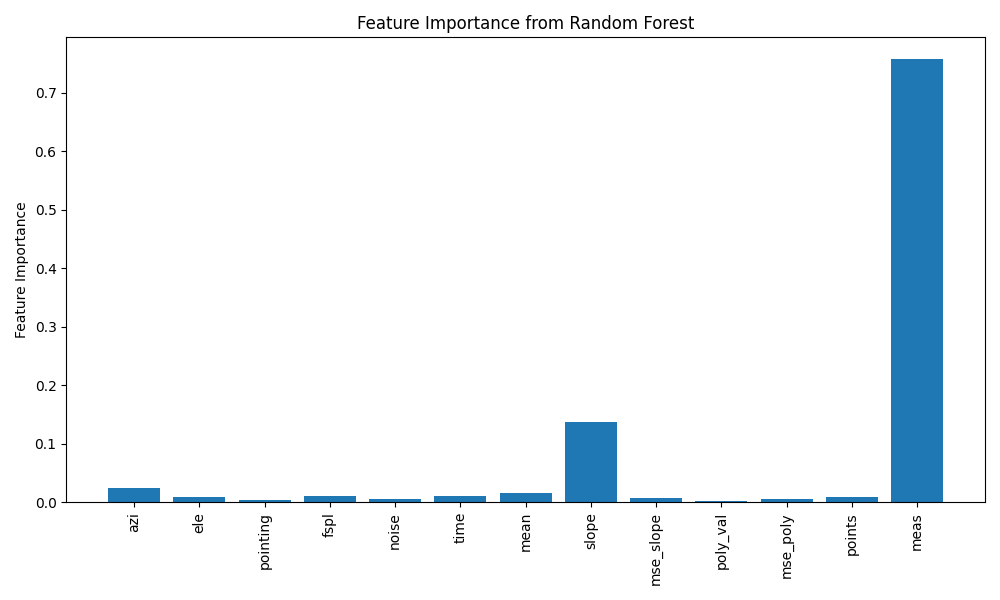

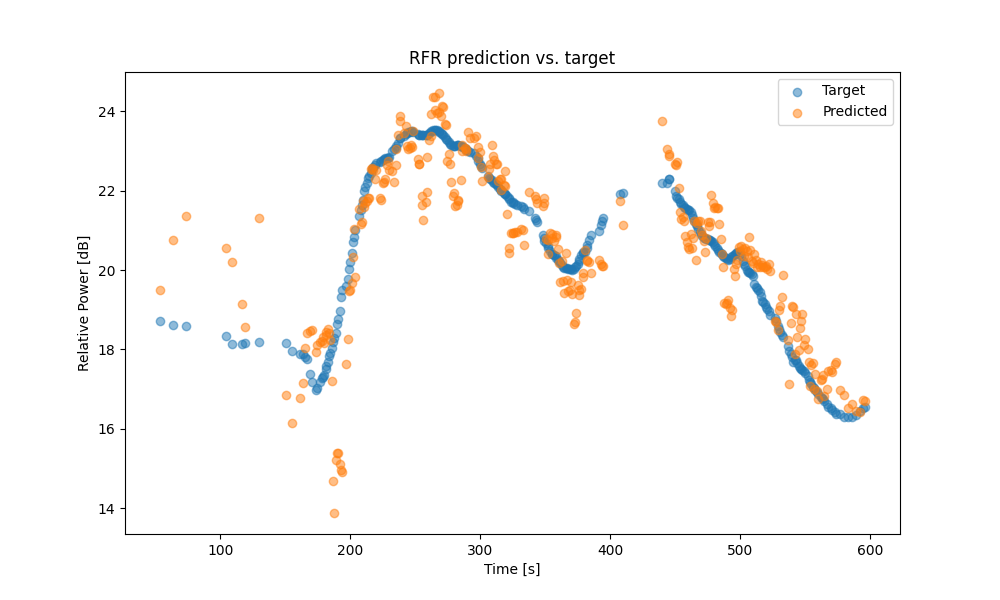

In [4]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Initialize the RandomForestRegressor
rfr = RandomForestRegressor(
    n_estimators=69,     # Number of trees in the forest
    max_depth=13,         # Maximum depth of each tree
    random_state=23,      # For reproducibility
    n_jobs=-1             # Use all available CPU cores
)

# Fit the model to the training data
# rfr.fit(train_X, train_y, sample_weight=train_weights)
rfr.fit(train_X, train_y, sample_weight=None)


plt.figure(figsize=(10, 6))
plt.bar(range(train_X.shape[1]), rfr.feature_importances_)
plt.xticks(range(train_X.shape[1]), ['azi',       # 0
                                     'ele',       # 1
                                     'pointing',  # 2
                                     'fspl',      # 3
                                     'noise',     # 4
                                     'time',      # 5
                                     'mean',      # 6
                                     'slope',     # 7
                                     'mse_slope', # 8
                                     'poly_val',  # 9
                                     'mse_poly',  # 10
                                     'points',    # 11
                                     'meas'],     # 12
           rotation=90)  # Rotate x-ticks
plt.ylabel('Feature Importance')
plt.title('Feature Importance from Random Forest')
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()
plt.savefig("figures/Feature_RFR.pdf")


from sklearn.metrics import accuracy_score
for test_x_normalized, test_x, test_y, test_weights in zip(X_test_normalized[:1], X_test[:1], y_test[:1], weights_test[:1]):
    # Predict using the model
    pred_y = rfr.predict(test_x_normalized)
    
    # Compute RMSE (Root Mean Squared Error)
    # test_mse = mean_squared_error(test_y, pred_y, sample_weight=test_weights)  # weighted MSE
    # test_mse = mean_squared_error(test_y, pred_y, sample_weight=None)
    # errors.append(test_y - pred_y)
    
    # Print RMSE
    # print(f'Mean Square Error: {test_mse:.2f}')
    
    # Plot actual vs predicted
    plt.figure(figsize=(10, 6))
    plt.scatter(test_x[:, 5], test_y, label='Target', alpha=0.5)
    plt.scatter(test_x[:, 5], pred_y, label='Predicted', alpha=0.5)
    plt.legend()
    plt.xlabel('Time [s]')
    plt.ylabel('Relative Power [dB]')
    plt.title('RFR prediction vs. target')
    plt.show()
    plt.savefig("figures/pred_RFR.pdf")

# predict the results
# y_pred=clf.predict(test_X)
# # check the accuracy
# test_rmse = (mean_squared_error(test_y, y_pred) ** (1 / 2)) #weighted RMSE
# print(test_rmse)


# Linear Predictive Coding (AR filter basically)

Mean AR Weights: [-0.33444591 -0.20225632 -0.07552355 -0.06047466 -0.03210118 -0.02049079
 -0.01810592 -0.0106026   0.01039698  0.002421    0.01213955  0.01506022
  0.01512139  0.01852518  0.01310049  0.00196033  0.00497546 -0.00445316
 -0.00651231 -0.01576468]


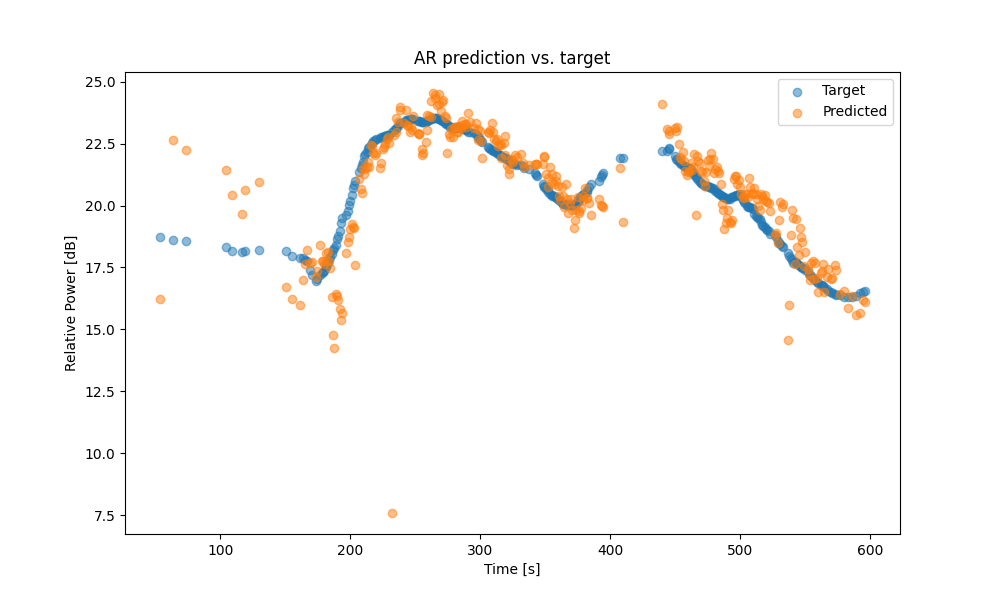

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf
from scipy.linalg import toeplitz
from numpy.linalg import inv

diff_data=[]
for x, y in zip(X, Y): #train using the train sets
    diff_data.append(np.diff(x[:,12],1))   # First order differencing
    # diff_data.append(x[:,12]-np.mean(x[:,12])) # Adjust the mean to zero
    # print(f"val_x shape: {val_x.shape}")

AR_weights=[]

for data in diff_data:

    # Calculate the ACF
    lags = 20  # Number of lags to compute
    acf_values = acf(data, nlags=lags, fft=True)  # Use FFT for faster computation
    R=toeplitz(acf_values[0:-1])
    inverse_R=np.linalg.inv(R)
    r=acf_values[1:]

    a=inverse_R@r
    AR_weights.append(a)


AR_weights = np.array(AR_weights)
mean_AR_weights = np.mean(AR_weights, axis=0)

print(f"Mean AR Weights: {mean_AR_weights}")


def forecast_arima(diff_data, a, data, forecast_horizon=10, initial_value=0):
    a = a.reshape(-1, 1)  # Create 2D array to use hstack
    predmatrix = toeplitz(diff_data, np.ones(len(a)) * 0)  # len(data) x a
    prediction = np.dot(predmatrix, a)  # len(data) x 1

    for i in range(1, forecast_horizon):
        predmatrix = np.hstack((prediction, predmatrix[:, :-1]))
        prediction = np.dot(predmatrix, a)

    prediction = np.sum(prediction, axis=1) + data[1:]
    prediction = np.insert(prediction, 0, initial_value)
    
    return prediction




for test_x_normalized, test_x, test_y, test_weights in zip(X_test_normalized[:1], X_test[:1], y_test[:1], weights_test[:1]):
    # Predict using the model
    pred_y = forecast_arima(np.diff(test_x[:,12],1),a=mean_AR_weights,data=test_x[:,12],forecast_horizon=10, initial_value=test_x[0,12])
    
    # Compute RMSE (Root Mean Squared Error)
    # test_mse = mean_squared_error(test_y, pred_y, sample_weight=test_weights)  # weighted MSE
    # test_mse = mean_squared_error(test_y, pred_y, sample_weight=None)
    # errors.append(test_y - pred_y)
    
    # Print RMSE
    # print(f'Mean Square Error: {test_mse:.2f}')
    
    # Plot actual vs predicted
    plt.figure(figsize=(10, 6))
    plt.scatter(test_x[:, 5], test_y, label='Target', alpha=0.5)
    plt.scatter(test_x[:, 5], pred_y, label='Predicted', alpha=0.5)
    plt.legend()
    plt.xlabel('Time [s]')
    plt.ylabel('Relative Power [dB]')
    plt.title('AR prediction vs. target')
    plt.show()
    plt.savefig("figures/pred_AR.pdf")
    



# ZOH, VCM and constant plot

-126.4670141996927


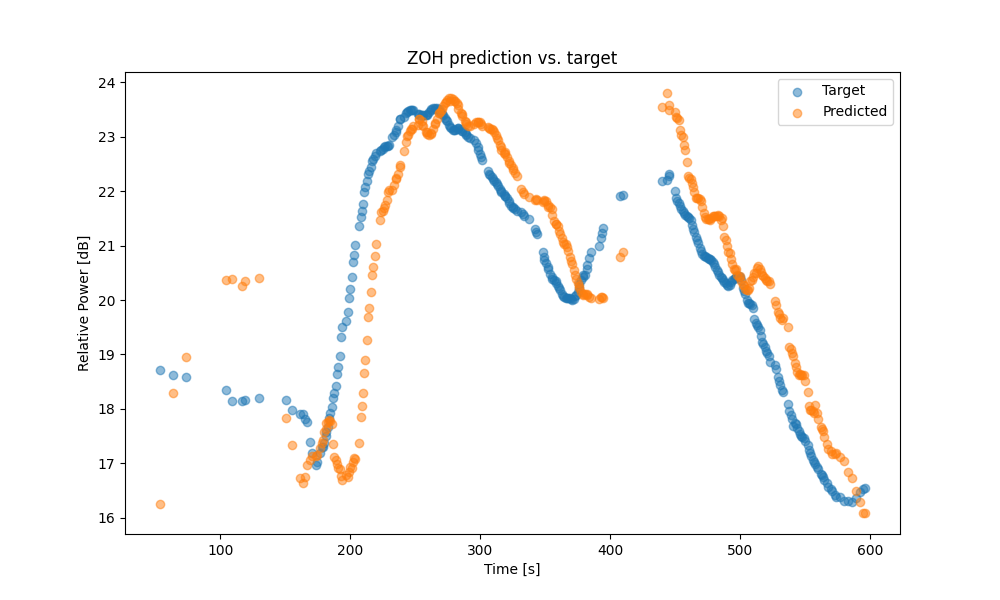

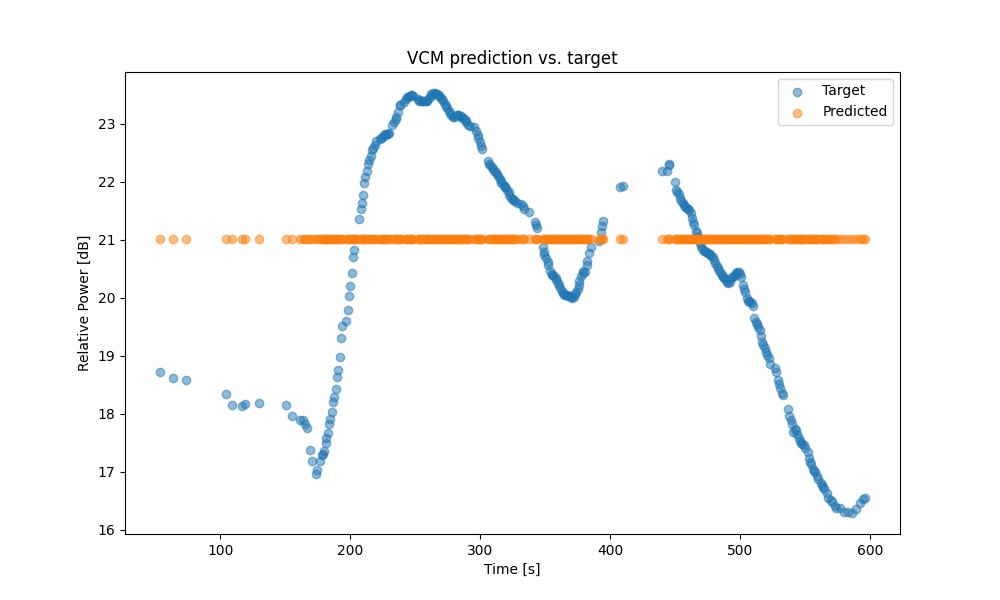

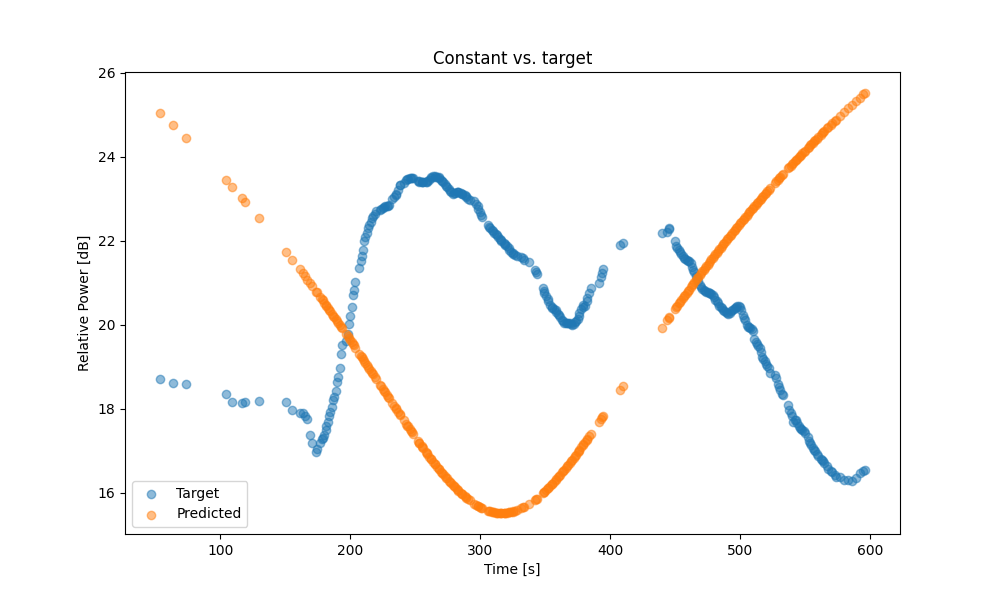

In [6]:

avg_power = np.mean(X_combined[:,12])

avg_power_const = np.mean(X_combined[:,12]+X_combined[:, 3])
print(avg_power_const)

for test_x_normalized, test_x, test_y, test_weights in zip(X_test_normalized[:1], X_test[:1], y_test[:1], weights_test[:1]):
    # Predict using the model
    pred_y = test_x[:, 6]
    
    # Plot actual vs predicted
    plt.figure(figsize=(10, 6))
    plt.scatter(test_x[:, 5], test_y, label='Target', alpha=0.5)
    plt.scatter(test_x[:, 5], pred_y, label='Predicted', alpha=0.5)
    plt.legend()
    plt.xlabel('Time [s]')
    plt.ylabel('Relative Power [dB]')
    plt.title('ZOH prediction vs. target')
    plt.show()
    plt.savefig("figures/pred_ZOH.pdf")
    
    pred_y = avg_power * np.ones(len(test_y))
    # Plot actual vs predicted
    plt.figure(figsize=(10, 6))
    plt.scatter(test_x[:, 5], test_y, label='Target', alpha=0.5)
    plt.scatter(test_x[:, 5], pred_y, label='Predicted', alpha=0.5)
    plt.legend()
    plt.xlabel('Time [s]')
    plt.ylabel('Relative Power [dB]')
    plt.title('VCM prediction vs. target')
    plt.show()
    plt.savefig("figures/pred_VCM.pdf")

    pred_y = avg_power_const*np.ones(len(test_y)) - test_x[:, 3]
    
    plt.figure(figsize=(10, 6))
    plt.scatter(test_x[:, 5], test_y, label='Target', alpha=0.5)
    plt.scatter(test_x[:, 5], pred_y, label='Predicted', alpha=0.5)
    plt.legend()
    plt.xlabel('Time [s]')
    plt.ylabel('Relative Power [dB]')
    plt.title('Constant vs. target')
    plt.show()
    plt.savefig("figures/pred_CONST.pdf")





# Comparison

Mean error for GBR: 0.0125006934688228
Mean error for RFR: 0.02588906923592077
Mean error for ZOH: -0.026958496877843418
Mean error for VCM: -0.05360114643593497
Mean error for AR: -0.04418506162810109
Mean error for CONST: -0.114092604175484


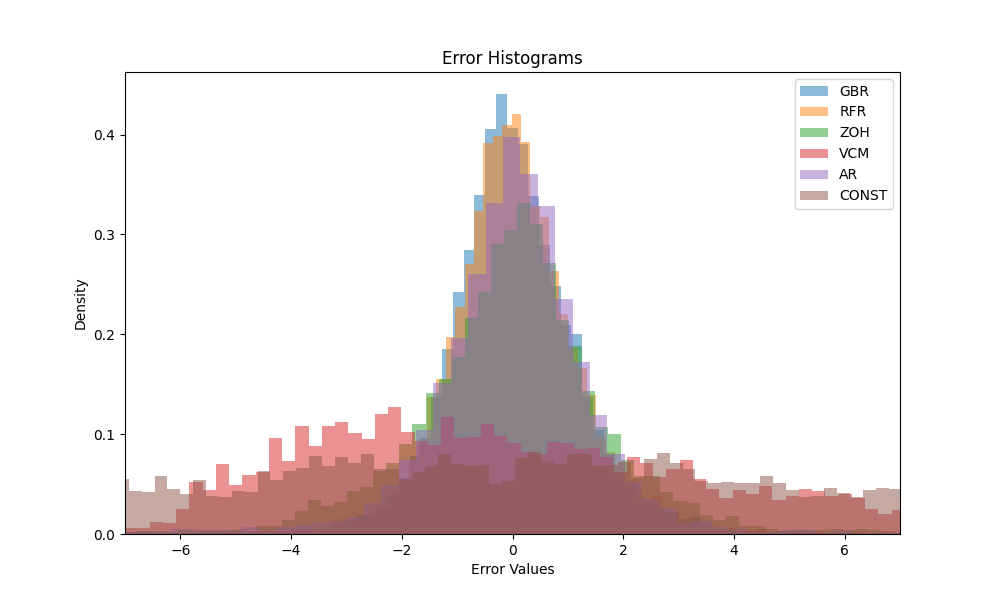

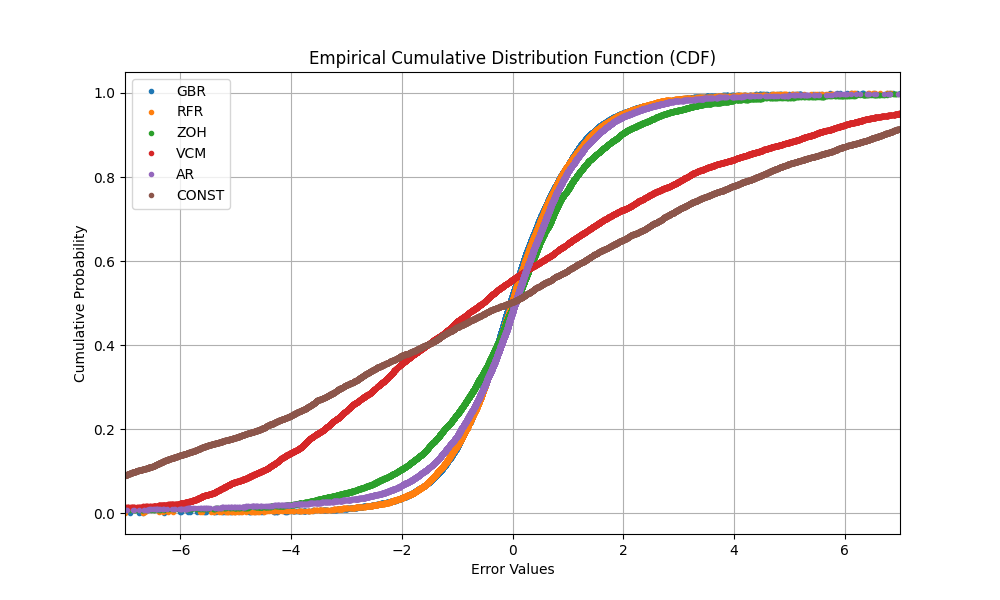

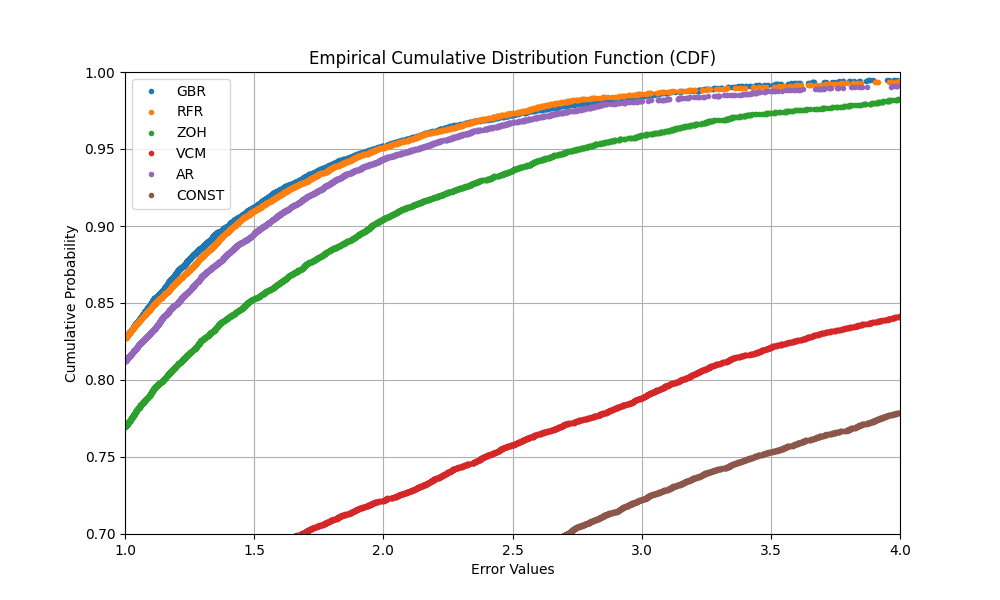

In [7]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Configuration: Specify which models to include
models_to_run = {
    "GBR": True,
    "RFR": True,
    "LGB": False,
    "ZOH": True,
    "VCM": True,
    "AR": True,
    "CONST": True,  # Added Linear Regression model
}

# Initialize error lists
errors = {
    "GBR": [],
    "RFR": [],
    "LGB": [],
    "ZOH": [],
    "VCM": [],
    "AR": [],
    "CONST": [],  # Added error list for Linear Regression
}
sorted_errors = {
    "GBR": [],
    "RFR": [],
    "LGB": [],
    "ZOH": [],
    "VCM": [],
    "AR": [],
    "CONST": [],  # Added error list for Linear Regression
}

# Calculate mean signal power
means = [np.mean(obj.clean_sig_abs) for obj in obj_act]
avg_power = np.mean(np.hstack(means))

# Evaluate models
for test_x_normalized, test_x, test_y, test_weights in zip(X_test_normalized, X_test, y_test, weights_test):
    if models_to_run["GBR"]:
        pred_y = gbr.predict(test_x_normalized)
        errors["GBR"].append(pred_y - test_y)
    if models_to_run["RFR"]:
        pred_y = rfr.predict(test_x_normalized)
        errors["RFR"].append(pred_y - test_y)
    if models_to_run["LGB"]:
        pred_y = lgb.predict(test_x_normalized)
        errors["LGB"].append(pred_y - test_y)
    if models_to_run["ZOH"]:
        pred_y = test_x[:, 6]  # the mean value of the last 20 points weighted
        errors["ZOH"].append(pred_y - test_y)
    if models_to_run["VCM"]:
        pred_y = avg_power * np.ones(len(test_y))  # VCM
        errors["VCM"].append(pred_y - test_y)
    if models_to_run["AR"]:
        pred_y = forecast_arima(np.diff(test_x[:, 12], 1), a=mean_AR_weights, data=test_x[:, 12], forecast_horizon=10, initial_value=test_x[0, 12])
        errors["AR"].append(pred_y - test_y)
    if models_to_run["CONST"]:
        pred_y = avg_power_const*np.ones(len(test_y)) - test_x[:, 3]
        errors["CONST"].append(pred_y - test_y)

# Combine errors for selected models
for key in errors:
    if models_to_run[key]:
        errors[key] = np.hstack(errors[key])
        print(f"Mean error for {key}: {np.mean(errors[key])}")
        # errors[key] = errors[key] - np.mean(errors[key])  # Center errors around zero

# Plot histograms for selected models
plt.figure(figsize=(10, 6))
for key in errors:
    if models_to_run[key]:
        plt.hist(errors[key], bins=100, alpha=0.5, label=key, density=True, cumulative=False, histtype='bar')
plt.legend()
plt.title('Error Histograms')
plt.xlabel('Error Values')
plt.xlim(-7, 7)
plt.ylabel('Density')
plt.show()
plt.grid()
plt.savefig('figures/histogram.pdf', dpi=225)

# Compute empirical CDF for selected models
cdf = {}
quantile_95_results = {}
for key in errors:
    if models_to_run[key]:
        sorted_errors[key] = np.sort(errors[key])
        cdf[key] = np.arange(1, len(errors[key]) + 1) / len(errors[key])
        median_error = np.median(sorted_errors[key])
        
        # Calculate the 95th quantile
        quantile_95 = np.percentile(sorted_errors[key], 95)  # 95th percentile
        quantile_95_results[key] = quantile_95

# Plot the CDFs for selected models
plt.figure(figsize=(10, 6))
for key in cdf:
    if models_to_run[key]:
        plt.plot(sorted_errors[key], cdf[key], label=f'{key}', marker='.', linestyle='none')

plt.title('Empirical Cumulative Distribution Function (CDF)')
plt.xlabel('Error Values')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.grid()
plt.xlim(-7, 7)
plt.show()
plt.savefig('figures/CDF.png', dpi=225)
plt.ylim(0.7, 1)
plt.xlim(1, 4)
plt.show()
plt.savefig('figures/CDF_zoomed.png', dpi=225)


Reference value for MAE percentage: 21.0829

MSE Results for All Models:
GBR: 1.4808
RFR: 1.5273
ZOH: 3.5669
VCM: 14.5997
AR: 2.8490
CONST: 24.2596

MAE Results for All Models (Absolute):
GBR: 0.8815
RFR: 0.8911
ZOH: 1.3019
VCM: 3.0969
AR: 1.0713
CONST: 4.0892

MAEP Results for All Models (Percentage):
GBR: 4.63%
RFR: 4.70%
ZOH: 6.83%
VCM: 16.55%
AR: 5.61%
CONST: 20.99%
Average noise power: -145.08 dBm
Ground truth capacity (mean): 30028.0787


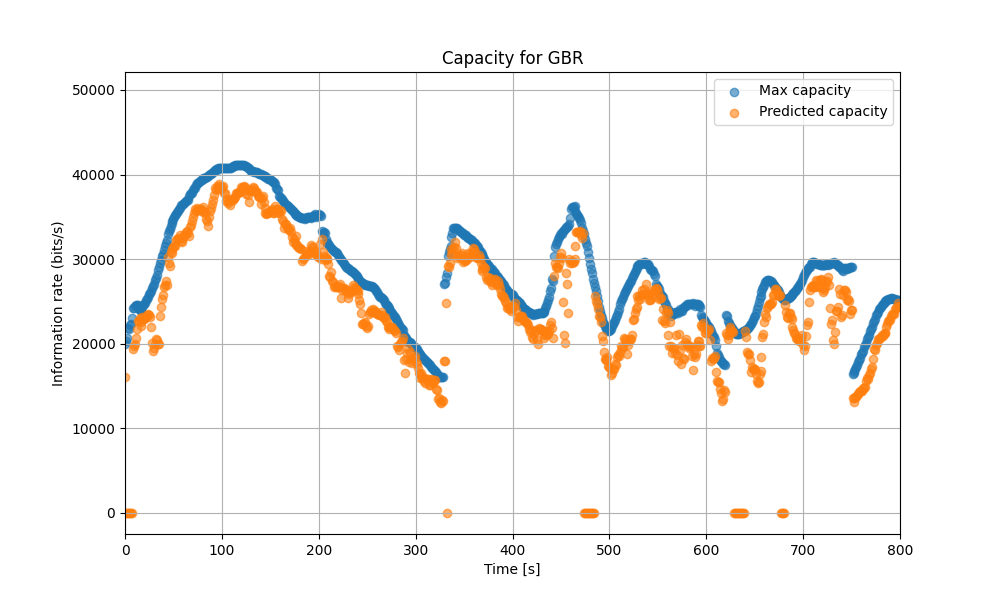

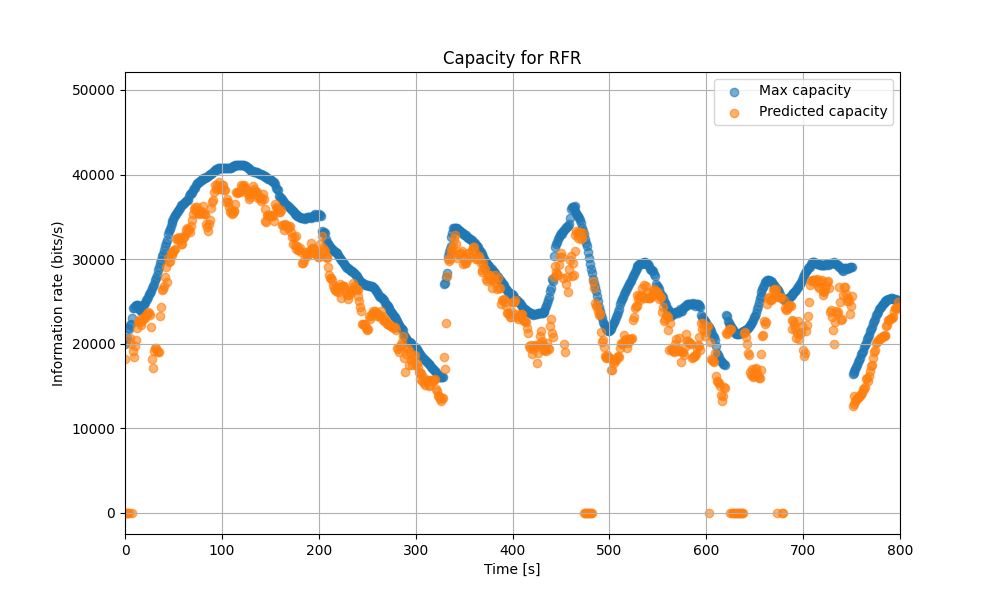

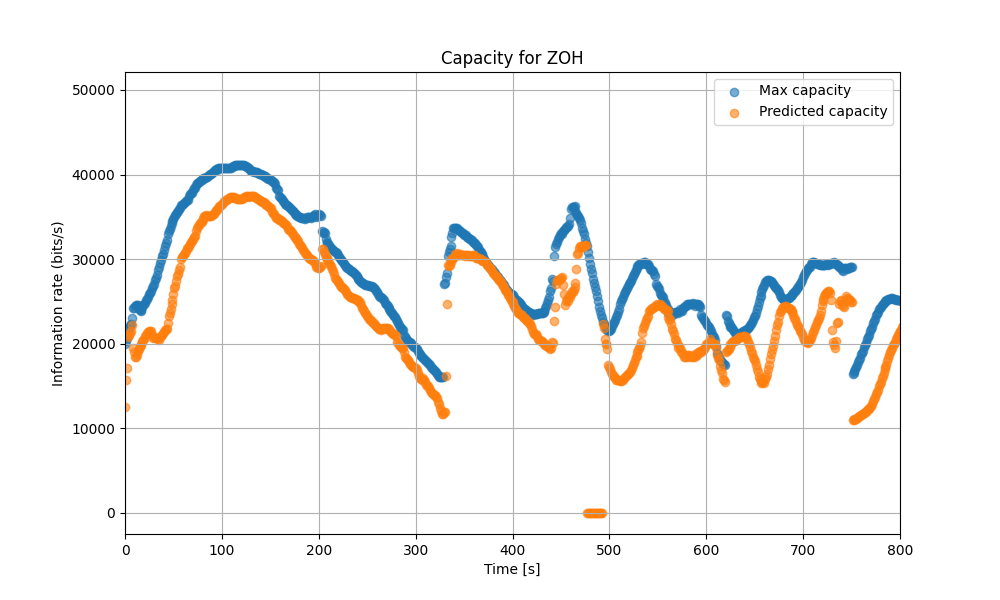

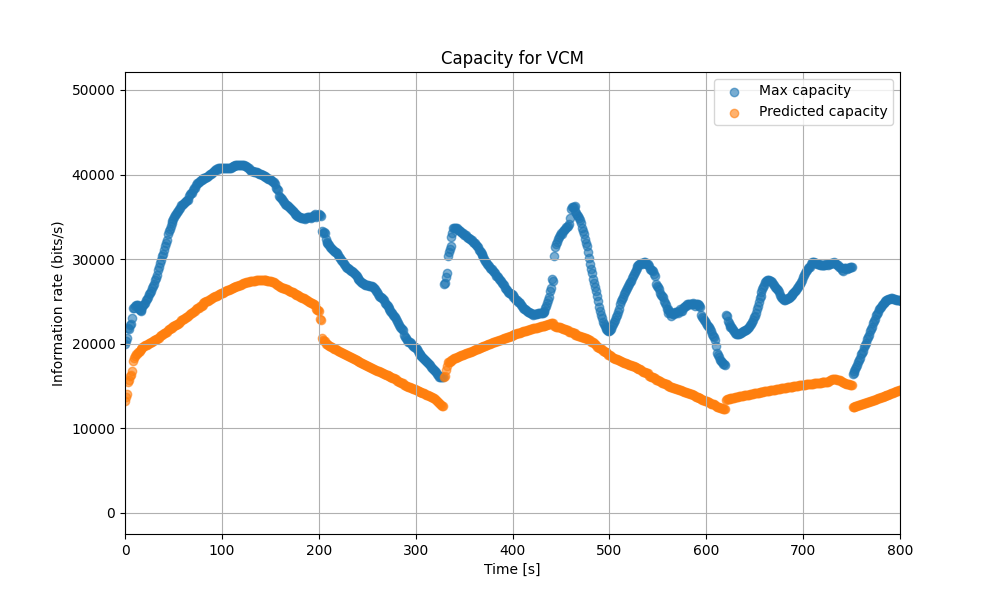

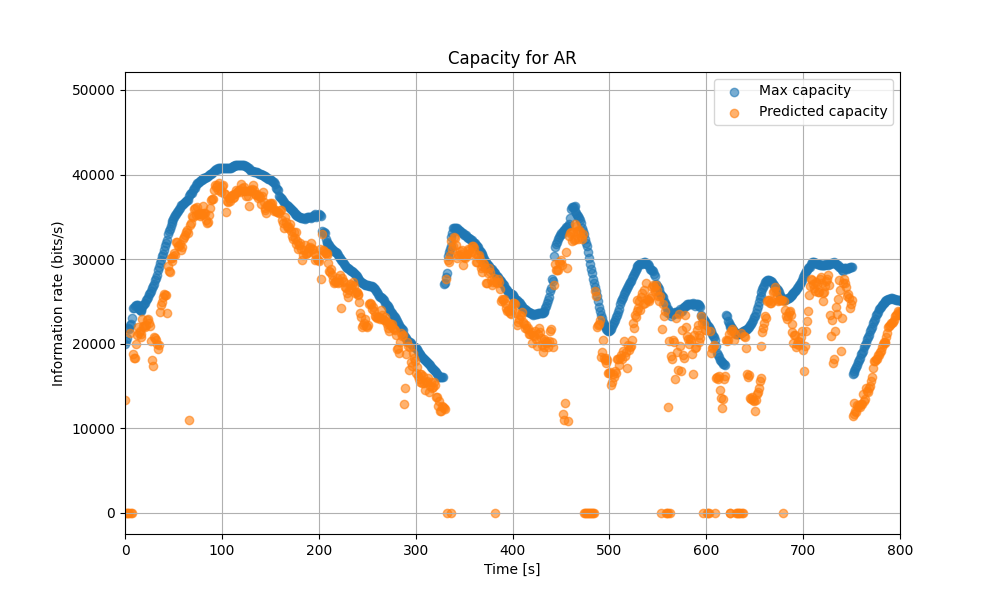

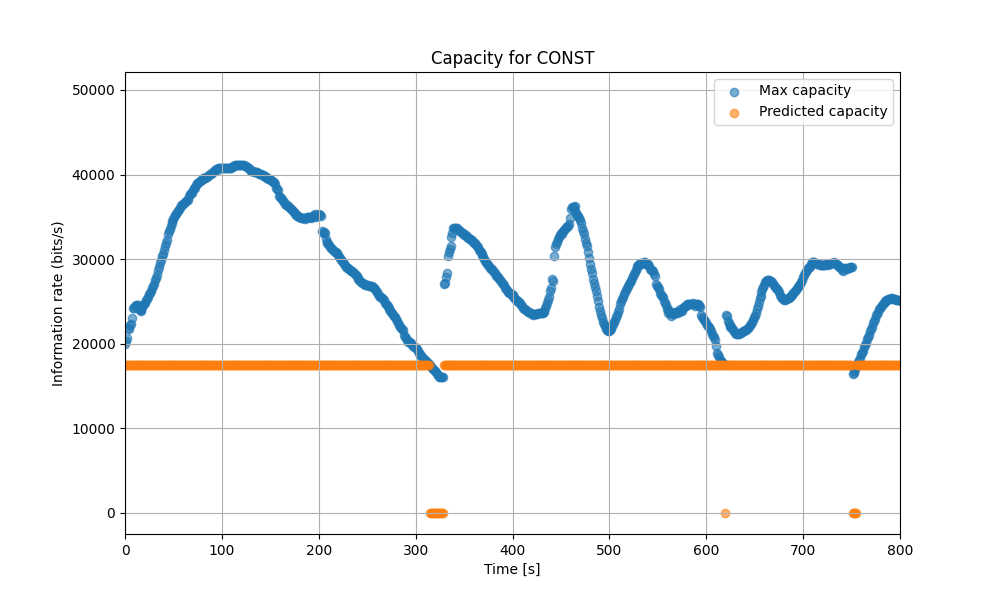


Capacity Results for All Models (Absolute):
GBR: 25772.6769
RFR: 25780.6844
ZOH: 24297.3127
VCM: 18150.3064
AR: 25224.9765
CONST: 16624.8207

 95th Quantiles:
GBR: 1.9606
RFR: 1.9784
ZOH: 2.7555
VCM: 6.9578
AR: 2.1320
CONST: 8.0007

Capacity Results for All Models (Percentage of Ground Truth):
GBR: 85.83%
RFR: 85.86%
ZOH: 80.92%
VCM: 60.44%
AR: 84.00%
CONST: 55.36%
Ground truth capacity (mean): 30028.0787


In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate MSE and MAE for each model across all passes
mse_results = {}
mae_results = {}
# mae_percentage = {}  # To store MAE as a percentage
capacity_percentage = {}  # To store capacity as a percentage
y_testlong=np.hstack(y_test)

# Assuming y_testlong is the ground truth for the target variable
reference_value_mae = np.mean(np.abs(y_testlong))  # Mean absolute value of ground truth
print(f"Reference value for MAE percentage: {reference_value_mae:.4f}")

for key in errors:
    if models_to_run[key]:
        # Calculate Mean Squared Error (MSE)
        squared_errors = errors[key] ** 2
        mse = np.mean(squared_errors)
        mse_results[key] = mse

        # Calculate Mean Absolute Error (MAE)
        mae = np.mean(np.abs(errors[key]))
        mae_results[key] = mae

        # Calculate MAE as a percentage of reference value
        # mae_percentage[key] = (mae / reference_value_mae) * 100

# Mean Absolute Error in Percentage (MAEP)
maep_results = {}

for key in errors:
    if models_to_run[key]:
        # Compute MAEP for each model
        relative_errors = np.abs(errors[key]) / np.abs(y_testlong)
        relative_errors[np.isinf(relative_errors)] = 0  # Handle division by zero for very small y_testlong
        maep_results[key] = np.mean(relative_errors) * 100  # Convert to percentage





# Display the MSE and MAE results
print("\nMSE Results for All Models:")
for model, mse in mse_results.items():
    print(f"{model}: {mse:.4f}")

print("\nMAE Results for All Models (Absolute):")
for model, mae in mae_results.items():
    print(f"{model}: {mae:.4f}")

# Display MAEP results
print("\nMAEP Results for All Models (Percentage):")
for model, maep in maep_results.items():
    print(f"{model}: {maep:.2f}%")

# Capacity calculations
Capacity = {}
B = 4800
noise_spectral_density = []

for obj in obj_act:
    noise_spectral_density.append(np.mean(obj.noise_obj.noise))

noise_spectral_density = np.mean(np.hstack(noise_spectral_density))
noise_power = 10 * np.log10(noise_spectral_density * B)
print(f"Average noise power: {noise_power:.2f} dBm")

signal_power = y_testlong + np.hstack([x[:, 3] for x in X_test])  # Extract FSPL and add to y_testlong
ground_truth_capacity = B * np.log2(1 + 10 ** ((signal_power - noise_power) / 10))  # Ground truth capacity
ground_truth_capacity_mean = np.mean(ground_truth_capacity)

print(f"Ground truth capacity (mean): {ground_truth_capacity_mean:.4f}")

mean_capacity = {}
for key in models_to_run:
    if models_to_run[key]:
        # Compute capacity with spectral efficiency adjustment
        Capacity[key] = B * np.log2(
            1 + 10 ** ((signal_power + (errors[key] - quantile_95_results[key]) - noise_power) / 10)
        )

        # Set capacity to 0 if error is positive
        Capacity[key][errors[key] - quantile_95_results[key] > 0] = 0

        # Calculate mean capacity and as percentage of ground truth
        mean_capacity[key] = np.mean(Capacity[key])
        capacity_percentage[key] = (mean_capacity[key] / ground_truth_capacity_mean) * 100

        # Plot the capacity
        plt.figure(figsize=(10, 6))
        plt.scatter(
            np.arange(0, len(y_testlong)),
            ground_truth_capacity,
            label="Max capacity",
            alpha=0.6,
        )
        plt.scatter(
            np.arange(0, len(y_testlong)),
            Capacity[key],
            label="Predicted capacity",
            alpha=0.6,
        )
        plt.legend()
        plt.title(f"Capacity for {key}")
        plt.xlabel("Time [s]")
        plt.ylabel("Information rate (bits/s)")
        plt.xlim(0, 800)
        plt.grid()
        plt.savefig(f"figures/capacity_{key}.pdf")
        plt.show()

# Display capacity results
print("\nCapacity Results for All Models (Absolute):")
for model, mean in mean_capacity.items():
    print(f"{model}: {mean:.4f}")

print("\n 95th Quantiles:")
for model, value in quantile_95_results.items():
    print(f"{model}: {value:.4f}")


print("\nCapacity Results for All Models (Percentage of Ground Truth):")
for model, percentage in capacity_percentage.items():
    print(f"{model}: {percentage:.2f}%")

print(f"Ground truth capacity (mean): {ground_truth_capacity_mean:.4f}")
